In [13]:
%run "../../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


patient = "kimj"
ampm = "am"
file = "http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20ampm=%27"+ampm+"%27%20AND%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"

lowerPercent = 0.25
upperPercent = 0.75

fileName = file;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')
dfOriginal

<IPython.core.display.Javascript object>

,pname,date,ampm,time,pef,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,kimj,2015-02-06,am,06:09:00,85,R,24.367,0.018,1.100,0.041,0.057,125.000,0.237,19.578,0.605,0.920,2115.567,0.010,0.803,0.025,0.038,86.822,-4.700,0.500,110.000,93.000,4.000,-5.600,1021.900,1026.300,-2.800,4.700,1021.900,93.000,-4.700,1018.000,42.000,9.400,3.900,51.000
1,kimj,2015-02-07,am,06:34:00,123,R,24.417,0.012,1.300,0.033,0.069,81.000,0.175,18.618,0.267,1.215,1262.033,0.007,0.763,0.011,0.050,51.687,-1.900,0.800,200.000,91.000,4.900,-3.100,1018.900,1023.300,-1.300,6.100,1023.000,94.000,-4.700,1018.900,44.000,10.800,4.100,50.000
2,kimj,2015-02-08,am,09:26:00,128,R,26.867,0.012,1.300,0.040,0.072,175.000,0.171,13.707,0.712,0.599,2000.300,0.006,0.510,0.026,0.022,74.453,-9.800,4.600,320.000,33.000,1.000,-23.000,1022.700,1027.200,-4.100,5.100,1022.700,91.000,-10.400,1015.500,32.000,15.500,7.200,59.000
3,kimj,2015-02-09,am,06:13:00,97,R,20.783,0.009,0.400,0.033,0.015,166.000,0.091,6.657,0.563,0.144,1573.650,0.004,0.320,0.027,0.007,75.717,-11.300,1.000,290.000,45.000,13.042,-20.900,1026.600,1031.200,-6.100,-5.700,1026.600,46.000,-11.300,1022.300,29.000,5.600,4.300,17.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,kimj,2016-02-01,am,09:36:00,126,R,23.767,0.007,0.600,0.035,0.031,51.000,0.115,10.743,0.664,0.385,953.000,0.005,0.452,0.028,0.016,40.098,-5.500,1.500,320.000,42.000,1.700,-16.400,1026.300,1030.800,-6.300,0.400,1026.500,58.000,-7.900,1024.400,31.000,8.300,2.100,27.000
361,kimj,2016-02-02,am,08:36:00,97,R,23.000,0.010,1.200,0.032,0.064,69.000,0.134,12.760,0.495,0.603,1091.400,0.006,0.555,0.022,0.026,47.452,-9.900,0.300,0.000,64.000,1.800,-15.400,1025.800,1030.300,-8.900,-1.000,1027.000,64.000,-9.900,1024.200,25.000,8.900,2.800,39.000
362,kimj,2016-02-03,am,08:57:00,158,R,24.350,0.011,1.400,0.036,0.073,87.000,0.171,20.610,0.317,1.127,1378.250,0.007,0.846,0.013,0.046,56.602,-8.400,0.000,0.000,76.000,2.500,-11.800,1024.900,1029.400,-7.700,1.200,1026.100,76.000,-9.900,1022.500,24.000,11.100,3.600,52.000
363,kimj,2016-02-04,am,05:47:00,98,R,20.833,0.011,1.500,0.043,0.073,103.000,0.136,19.167,0.353,0.937,1295.867,0.007,0.920,0.017,0.045,62.202,-3.400,1.100,180.000,86.000,4.100,-5.400,1022.400,1026.800,-3.900,4.700,1025.300,87.000,-8.400,1022.400,35.000,13.100,2.900,52.000


In [14]:
#Break into groups by percentage

dfOriginal.sort_values(by='pef', ascending=True, inplace=True)
dfOriginal.reset_index(drop=True, inplace=True)
numberOfElements = len(dfOriginal)
upperBoundary = upperPercent*numberOfElements
lowerBoundary = lowerPercent*numberOfElements
dfOriginal['percent_group']=-1

for i in dfOriginal.index:

    if i < lowerBoundary:
        dfOriginal['percent_group'][i] = 0

    elif i > upperBoundary : 
        dfOriginal['percent_group'][i] = 2

    else:
        dfOriginal['percent_group'][i] = 1

print(dfOriginal)

    pname        date ampm      time  pef pef_zone  tm_window  so2_max  co_max  o3_max  no2_max  pm10_max  so2_sum  co_sum  o3_sum  no2_sum  pm10_sum  so2_avg  co_avg  o3_avg  no2_avg  pm10_avg  temperaturec  windspeedms  winddirection  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperature_max  airpressure_max  precipitation_max  temperature_min  airpressure_min  precipitation_min  temperature_diff  airpressure_diff  precipitation_diff  percent_group
0    kimj  2016-01-13   am  09:56:00   72        R     24.567    0.007   0.700   0.027    0.045    51.000    0.119  12.740   0.382    0.748   960.367    0.005   0.519   0.016    0.030    39.092        -4.100        0.700        250.000                62.000             2.800               -10.300        1018.100             1022.500              -3.700            1.600         1022.300             74.000           -6.800         1017.400             24.000        

In [15]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 

df=df.reset_index(drop=True)

#2. Combine 
df=df.fillna(0)
sdttm = df.date + " " + df.time
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "pef_zone,cname, pname, date, time, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, temperature_diff, airpressure_diff, precipitation_diff, tm_window".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

nq = 5
lnq=list(range(0,nq))
s= pd.qcut(df1.pef, nq, labels=lnq )
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)





columns =  '''so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,
 temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,percent_group'''

#'''pefcat,pef_zone,so2_max,co_max,o3_max,no2_max,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
#dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,temperature_min'''

 
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
#displayDFs (df1, maxrows=3 )
df1

,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,percent_group
sdttm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-02-06 06:09:00,0.018,1.100,0.041,0.057,125.000,0.237,19.578,0.605,0.920,2115.567,0.010,0.803,0.025,0.038,86.822,-4.700,0.500,110.000,93.000,4.000,-5.600,1021.900,1026.300,-2.800,4.700,1021.900,93.000,-4.700,1018.000,42.000,0
2015-02-07 06:34:00,0.012,1.300,0.033,0.069,81.000,0.175,18.618,0.267,1.215,1262.033,0.007,0.763,0.011,0.050,51.687,-1.900,0.800,200.000,91.000,4.900,-3.100,1018.900,1023.300,-1.300,6.100,1023.000,94.000,-4.700,1018.900,44.000,1
2015-02-08 09:26:00,0.012,1.300,0.040,0.072,175.000,0.171,13.707,0.712,0.599,2000.300,0.006,0.510,0.026,0.022,74.453,-9.800,4.600,320.000,33.000,1.000,-23.000,1022.700,1027.200,-4.100,5.100,1022.700,91.000,-10.400,1015.500,32.000,1
2015-02-09 06:13:00,0.009,0.400,0.033,0.015,166.000,0.091,6.657,0.563,0.144,1573.650,0.004,0.320,0.027,0.007,75.717,-11.300,1.000,290.000,45.000,13.042,-20.900,1026.600,1031.200,-6.100,-5.700,1026.600,46.000,-11.300,1022.300,29.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-01 09:36:00,0.007,0.600,0.035,0.031,51.000,0.115,10.743,0.664,0.385,953.000,0.005,0.452,0.028,0.016,40.098,-5.500,1.500,320.000,42.000,1.700,-16.400,1026.300,1030.800,-6.300,0.400,1026.500,58.000,-7.900,1024.400,31.000,1
2016-02-02 08:36:00,0.010,1.200,0.032,0.064,69.000,0.134,12.760,0.495,0.603,1091.400,0.006,0.555,0.022,0.026,47.452,-9.900,0.300,0.000,64.000,1.800,-15.400,1025.800,1030.300,-8.900,-1.000,1027.000,64.000,-9.900,1024.200,25.000,0
2016-02-03 08:57:00,0.011,1.400,0.036,0.073,87.000,0.171,20.610,0.317,1.127,1378.250,0.007,0.846,0.013,0.046,56.602,-8.400,0.000,0.000,76.000,2.500,-11.800,1024.900,1029.400,-7.700,1.200,1026.100,76.000,-9.900,1022.500,24.000,2
2016-02-04 05:47:00,0.011,1.500,0.043,0.073,103.000,0.136,19.167,0.353,0.937,1295.867,0.007,0.920,0.017,0.045,62.202,-3.400,1.100,180.000,86.000,4.100,-5.400,1022.400,1026.800,-3.900,4.700,1025.300,87.000,-8.400,1022.400,35.000,0


In [16]:
# from sklearn.neural_network import MLPClassifier
# nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# clf = nn;

# Y_SCALER = None
# #Normalize the input and save the scalar for outcome variable "pefmax" in this case.
# scaler = StandardScaler()
# dp = prepareDF(df1, True)
# for c in dp.columns:
#     if ( c == 'pefcat'):
#         #Y_SCALER = StandardScaler()
#         #dp[c] = Y_SCALER.fit_transform(dp[c])
#         pass;
#     else:
#         dp[c] = scaler.fit_transform(dp[c])
        
# #dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]
# dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

# X = dp1.ix[:, dp1.columns != 'pefcat']
# y = dp1.pefcat 
# X = X.as_matrix().astype(np.float)


# kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
# y_pred = y.copy()

# # Iterate through folds\
# i = 0;
# for train_index, test_index in kf.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train = y[train_index]
#     # Initialize a classifier with key word arguments\
#     print ("*",i, end ="");
#     clf.fit(X_train,y_train)
#     y_pred[test_index] = clf.predict(X_test)
#     i = i +1;



Feature space holds 364 observations and 30 features
Unique target labels: [0 1 2]
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.505495 
   DecisionTree Gini r^2 score: -0.044215
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.458791 
   DecisionTree Entr r^2 score: -0.303887
* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.475275 
                 SVM r^2 score: -0.370187
* 0* 1* 2* 3* 4*
       Random Forest accuracy: 0.445055 
       Random Forest r^2 score: -0.464111
* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.414835 
                K-NN r^2 score: -0.756933
* 0* 1* 2* 3* 4*
   Gradient Boosting accuracy: 0.412088 
   Gradient Boosting r^2 score: -0.497260
* 0* 1* 2* 3* 4*
    Logit Regression accuracy: 0.486264 
    Logit Regression r^2 score: -0.447536
* 0* 1* 2* 3* 4*
         Naive Bayes accuracy: 0.329670 
         Naive Bayes r^2 score: -1.640924


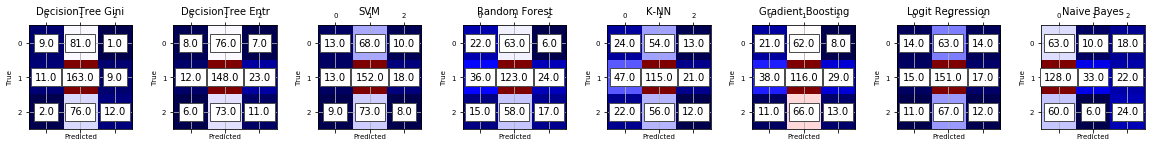

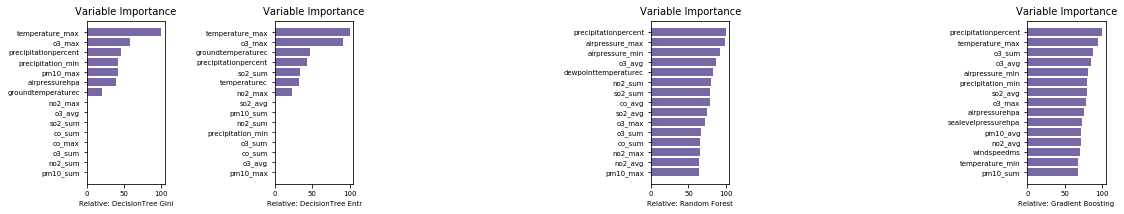

DecisionTree Gini Metrics
             precision    recall  f1-score   support

    class 0       0.41      0.10      0.16        91
    class 1       0.51      0.89      0.65       183
    class 2       0.55      0.13      0.21        90

avg / total       0.49      0.51      0.42       364

DecisionTree Entr Metrics
             precision    recall  f1-score   support

    class 0       0.31      0.09      0.14        91
    class 1       0.50      0.81      0.62       183
    class 2       0.27      0.12      0.17        90

avg / total       0.39      0.46      0.39       364

SVM Metrics
             precision    recall  f1-score   support

    class 0       0.37      0.14      0.21        91
    class 1       0.52      0.83      0.64       183
    class 2       0.22      0.09      0.13        90

avg / total       0.41      0.48      0.40       364

Random Forest Metrics
             precision    recall  f1-score   support

    class 0       0.30      0.24      0.27        91
   

In [17]:
from sklearn.naive_bayes import GaussianNB

predictColumn = "pefcat"
predictColumn = "pef_zone"
predictColumn = "percent_group"

if ( 'pefcat' in df1.columns ):
    df1.pefcat = df1.pefcat.astype(int)
    df1=df1.drop('pefcat', axis=1)

cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(kernel="linear"), 
#        "SVM1"              , SVC(kernel="rbf", C=10**3),
        "Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(),
#        "Neural NW"         , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 10), random_state=1),
        "Naive Bayes"       , GaussianNB()
];

y = df1[predictColumn]
X = df1.drop(predictColumn, axis=1)
a = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)

for i in cls:
    if type(i) is str:
        y_pred = a[4][i]
        target_names = ['class 0', 'class 1', 'class 2']
        print(i + ' Metrics')
        y.replace(to_replace="R", value=0, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="Y", value=1, inplace=True, limit=None, regex=False, method='pad', axis=None)
        print(classification_report(y, y_pred, target_names=target_names))


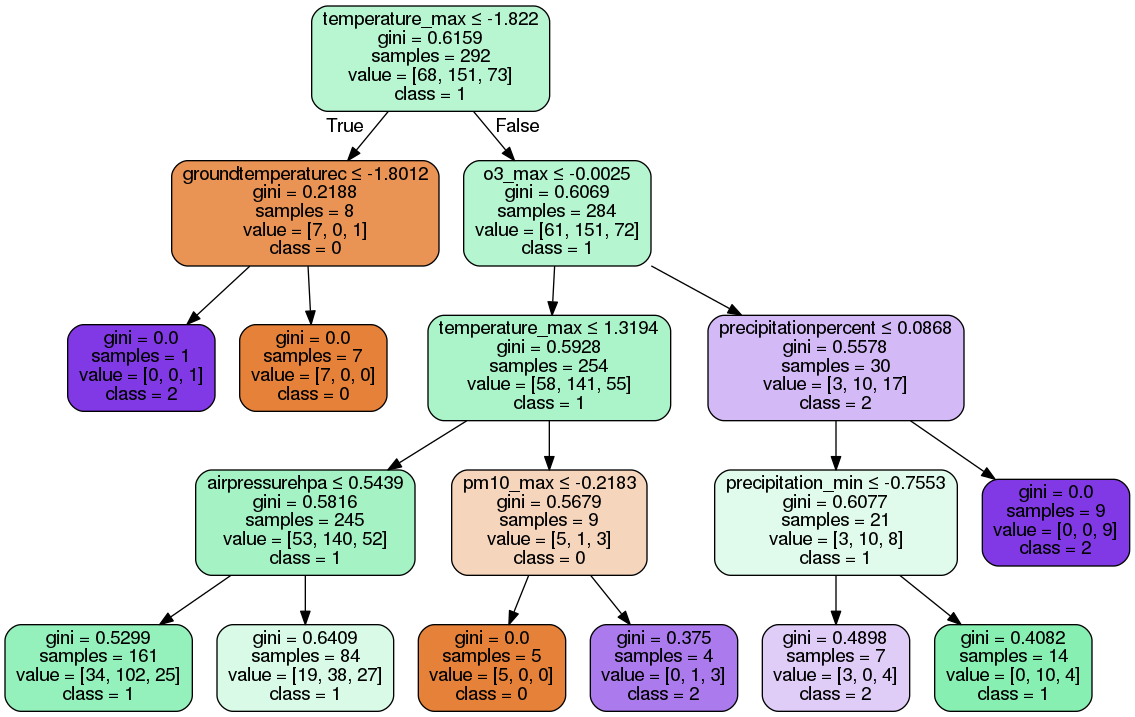

In [18]:
#(X1,y1,ra,cls) = Classify1(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=False)
DrawDecisionTree(X,y, cls[1])
